In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
df = pd.read_csv('G:/My Drive/ASU/591/customers.csv')
df_trsc = pd.read_csv("G:/My Drive/ASU/591/transactions_train.csv")


FileNotFoundError: ignored

In [ ]:
df_art = pd.read_csv("G:/My Drive/ASU/591/articles.csv")

In [ ]:
df_art1 = df_art[['article_id','product_group_name']]
df_art1

,article_id,product_group_name
0,108775015,Garment Upper body
1,108775044,Garment Upper body
2,108775051,Garment Upper body
3,110065001,Underwear
4,110065002,Underwear
...,...,...
105537,953450001,Socks & Tights
105538,953763001,Garment Upper body
105539,956217002,Garment Full body
105540,957375001,Accessories


In [ ]:
df['FN'] = df['FN'].fillna(0)
df['Active'] = df['Active'].fillna(0)
df = df.dropna()
df['fashion_news_frequency'].iloc[df.fashion_news_frequency == 'NONE'] = 'None'
df=pd.get_dummies(data=df, columns=['club_member_status', 'fashion_news_frequency'])
df

C:\Users\fhuang36\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,FN,Active,age,postal_code,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1,0,0,0,1,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1,0,0,0,1,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1,0,0,0,1,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1,0,0,0,1,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,1,0,0,0,1,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,1,0,0,0,1,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,1,0,0,0,0,1
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,1,0,0,0,0,1


In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.drop(['customer_id', 'FN','postal_code'],axis=1))
    distortions.append(kmeanModel.inertia_)

KeyboardInterrupt: 

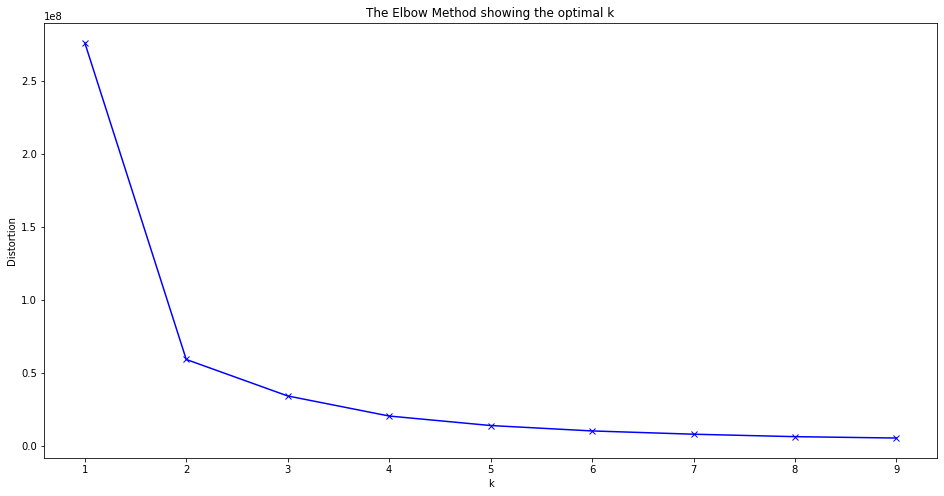

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.drop(['customer_id', 'FN','postal_code'],axis=1))

In [ ]:
df['label']=kmeans.labels_
df.corr()

,FN,Active,age,club_member_status_ACTIVE,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,fashion_news_frequency_Monthly,fashion_news_frequency_None,fashion_news_frequency_Regularly,label
FN,1.000000,0.979723,0.034786,0.155598,-0.013232,-0.154982,0.032873,-0.995293,0.993969,0.021696
Active,0.979723,1.000000,0.037691,0.152406,-0.013286,-0.151778,0.031616,-0.975986,0.974720,0.023148
age,0.034786,0.037691,1.000000,-0.080743,-0.003094,0.081190,0.005743,-0.034588,0.034302,0.672139
club_member_status_ACTIVE,0.155598,0.152406,-0.080743,1.000000,-0.071887,-0.997056,-0.000792,-0.155577,0.155679,-0.077880
club_member_status_LEFT CLUB,-0.013232,-0.013286,-0.003094,-0.071887,1.000000,-0.004809,-0.000466,0.013263,-0.013244,-0.002278
club_member_status_PRE-CREATE,-0.154982,-0.151778,0.081190,-0.997056,-0.004809,1.000000,0.000830,0.154959,-0.155063,0.078256
fashion_news_frequency_Monthly,0.032873,0.031616,0.005743,-0.000792,-0.000466,0.000830,1.000000,-0.033612,-0.018567,0.004448
fashion_news_frequency_None,-0.995293,-0.975986,-0.034588,-0.155577,0.013263,0.154959,-0.033612,1.000000,-0.998639,-0.021512
fashion_news_frequency_Regularly,0.993969,0.974720,0.034302,0.155679,-0.013244,-0.155063,-0.018567,-0.998639,1.000000,0.021289
label,0.021696,0.023148,0.672139,-0.077880,-0.002278,0.078256,0.004448,-0.021512,0.021289,1.000000


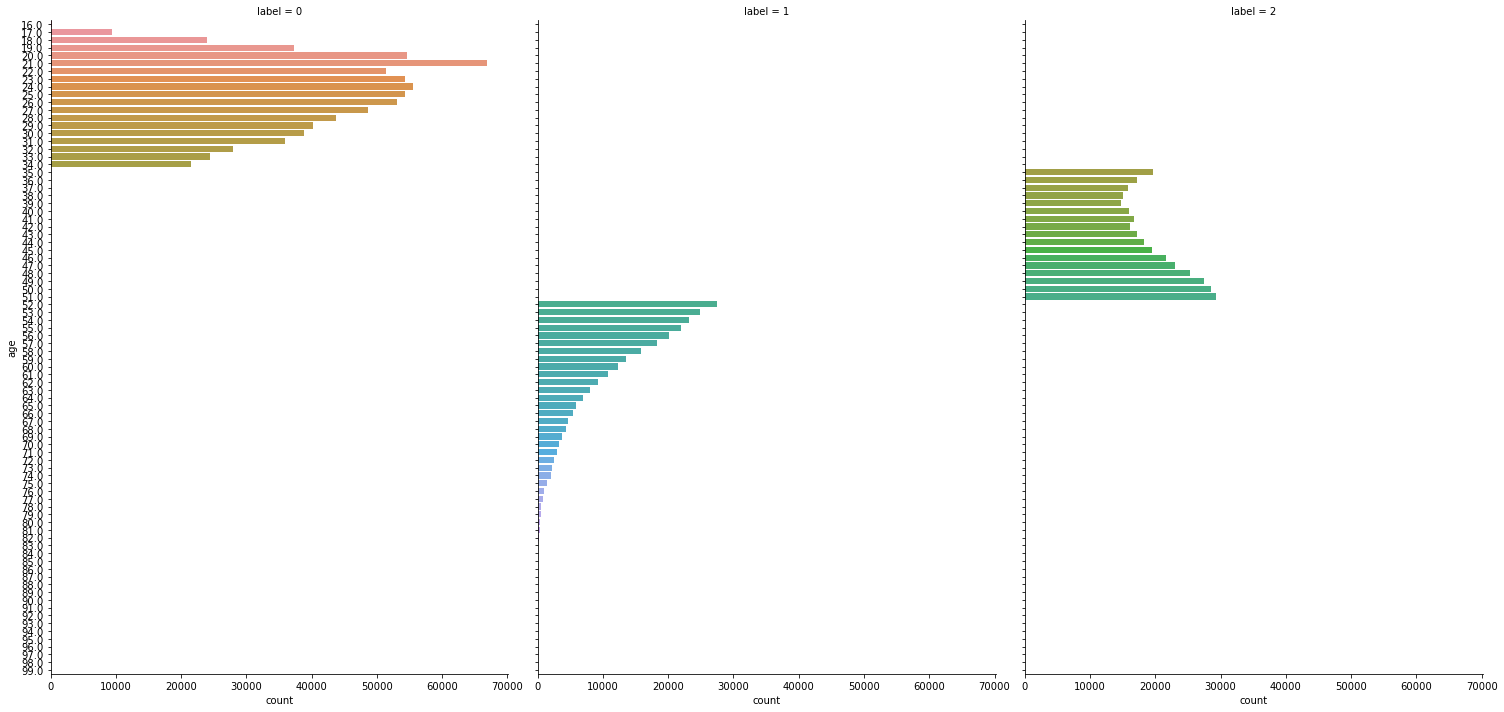

In [ ]:
sns.catplot(y="age", col="label",
                data=df, kind="count",
                height=10, aspect=.7);

In [ ]:
df_output=df[['customer_id','label']]
df_output

,customer_id,label
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,1
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0


In [ ]:
df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [ ]:
result = pd.merge(df_trsc,df_output,how = 'inner', on = ['customer_id'])
result

,t_dat,customer_id,article_id,price,sales_channel_id,label
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,0
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.025407,2,0
...,...,...,...,...,...,...
31471567,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,1
31471568,2020-09-22,fee56cc5315dafb35a4490ccc6f711092cae913550c832...,903647001,0.050831,2,1
31471569,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,913597001,0.042356,2,0
31471570,2020-09-22,ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a78519...,903420001,0.033881,2,0


In [ ]:
result['label'].value_counts()

0    17995948
2     8338832
1     5136792
Name: label, dtype: int64

In [ ]:
result
result_final = pd.merge(result,df_art1,how = 'inner', on = ['article_id'])

In [ ]:
result_final

,t_dat,customer_id,article_id,price,sales_channel_id,label,product_group_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0,Underwear
1,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0,Underwear
2,2018-11-05,1385e5f3a2d3dbd21237f91faf81254a6d96de31b07b0b...,663713001,0.050831,2,0,Underwear
3,2018-11-05,1385e5f3a2d3dbd21237f91faf81254a6d96de31b07b0b...,663713001,0.050831,2,0,Underwear
4,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,0,Underwear
...,...,...,...,...,...,...,...
31471567,2020-09-22,39e3a68996f1b02fc97157c978e23bf5ada4b43541ef8b...,886270008,0.045746,2,2,Garment Lower body
31471568,2020-09-22,39e3a68996f1b02fc97157c978e23bf5ada4b43541ef8b...,886270008,0.045746,2,2,Garment Lower body
31471569,2020-09-22,ec794d6268ee3c75b5bbea014e3299d994bcd1180ecf6d...,860135008,0.038119,1,2,Garment Upper body
31471570,2020-09-22,ec794d6268ee3c75b5bbea014e3299d994bcd1180ecf6d...,539060028,0.016017,1,2,Garment Upper body


In [ ]:
result_final.groupby(['label','product_group_name']).size()

label  product_group_name   
0      Accessories               982904
       Bags                        4670
       Cosmetic                     458
       Fun                            2
       Furniture                    271
       Garment Full body        1958135
       Garment Lower body       3803588
       Garment Upper body       6868655
       Garment and Shoe care        154
       Interior textile              39
       Items                       3313
       Nightwear                 182225
       Shoes                     428245
       Socks & Tights            387113
       Stationery                   137
       Swimwear                 1708209
       Underwear                1611661
       Underwear/nightwear          297
       Unknown                    55872
1      Accessories               216484
       Bags                         919
       Cosmetic                     183
       Furniture                     78
       Garment Full body         611862
       Garm

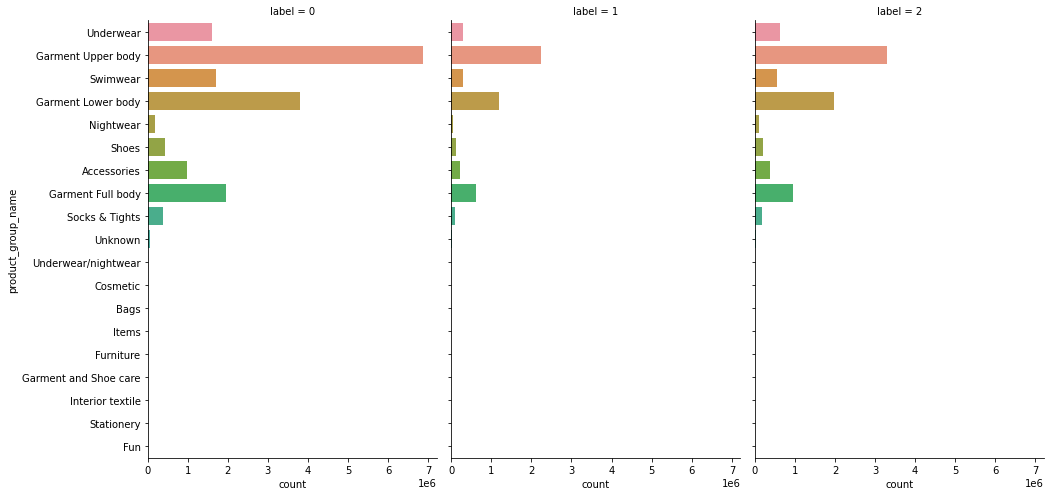

In [ ]:
sns.catplot(y="product_group_name", col="label",
                data=result_final, kind="count",
                height=7, aspect=.7);